# Neural Networking Playground

In [2]:
import numpy as np
import pandas as pd
import torch.multiprocessing as mp

import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = True

from lib.utils.perfmets import MSE
from lib.Conventional_NN import network

### Load some data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/practiceprobs/datasets/main/iris/iris.csv")
print(df.head())

data = df.to_numpy()
x = data[:,0:-1].astype(np.float64)
y_class = data[:,-1]
y_1hot = np.zeros((y_class.shape[0],3))
for i in range(y_class.size):
    if y_class[i]=="Iris-setosa":
        y_1hot[i,0] = 1
    elif y_class[i]=="Iris-versicolor":
        y_1hot[i,1] = 1
    elif y_class[i]=="Iris-virginica":
        y_1hot[i,2] = 1

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


### Instantiate network

In [5]:
n = network(4,4,3)
n.init_random_weights()


Beginning training routine...


/home/pacel/docs/CNNs/lib/utils/activations.py:5: RuntimeWarning: overflow encountered in exp
  def sigmoid(x): return 1/(1+np.exp(-x))
/home/pacel/docs/CNNs/lib/Conventional_NN.py:113: RuntimeWarning: overflow encountered in matmul
  self.dw = self.OUT @ self.din.T



Training Complete!



### Training routine

In [6]:
err = n.train(x,y_1hot,0.01,10000,batch_size=50)


Beginning training routine...

Training Complete!



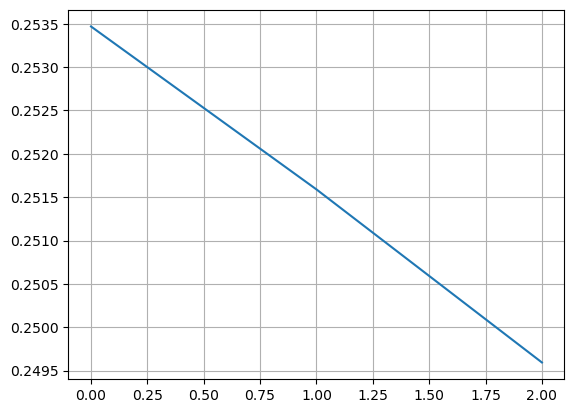

In [5]:
epochs = np.arange(err.size)
plt.plot(epochs,err)
plt.show()